In [167]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify

In [2]:
#allow in line graphics to view the plots
%matplotlib inline

In [3]:
#resize the graphics - will likely update 
#plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
#geojson file from the city of chicago data portal to graph the neighborhood boundaries
chicago = gpd.read_file('chicago_boundaries.geojson')

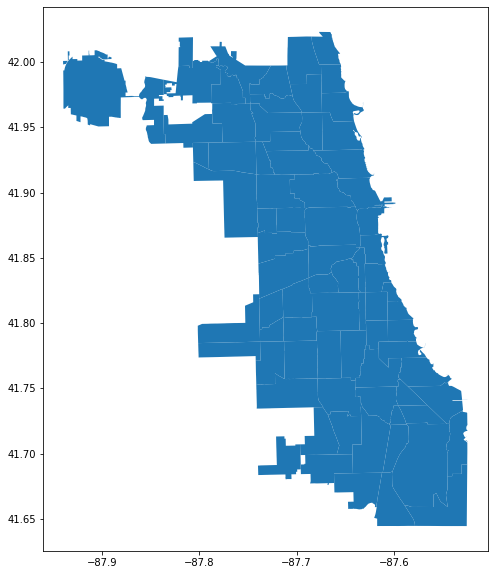

In [7]:
chicago.plot();

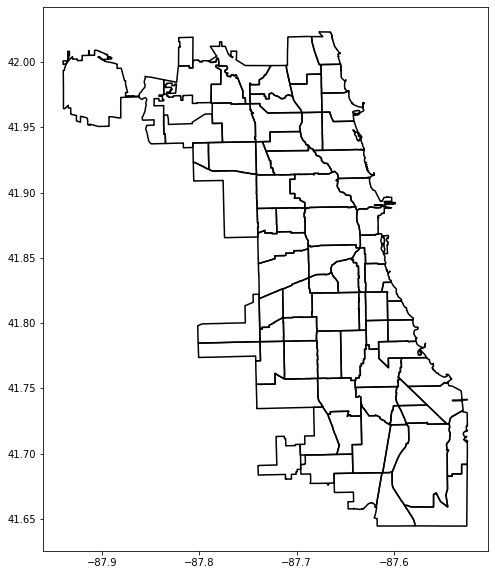

In [105]:
#plot just the neighborhood boundaries? 
chicago.boundary.plot(color = "black");

In [153]:
chicago.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


In [177]:
#need to create a layer of the restaurants 
#load in the restaurants data frame which should include lat/long 
restaurant = pd.read_csv("CSVs/all_businesses.csv", index_col =0 )
#updated version includes lat/long - thanks Egemen! 
#ignore function below
restaurant.head()

,id,alias,name,is_claimed,is_closed,review_count,rating,coordinates,business_type,price,...,city,state,delivery,pickup,covid_cases,covid_tests,covid_deaths,zipcode_population,latitude,longitude
0,2OGQfIsT33WC7sCKdqKuuw,carmelo-s-taco-place-chicago,Carmelo’s Taco Place,True,False,12.0,4.5,"{'latitude': 41.78663, 'longitude': -87.69294}",Restaurant,NaN,...,Chicago,IL,True,True,14161.0,81300.0,200.0,111850.0,41.786630,-87.692940
1,YULX9j3fdcLtUNYHax19JA,maggie-gyros-and-chicken-chicago,Maggie Gyros & Chicken,False,False,5.0,2.5,"{'latitude': 41.8092351, 'longitude': -87.6178...",Restaurant,NaN,...,Chicago,IL,True,True,1914.0,30921.0,52.0,31972.0,41.809235,-87.617828
2,6hhWuqvuEIEescMsh807pw,morenas-kitchen-chicago,Morena's Kitchen,True,False,41.0,4.5,"{'latitude': 41.916978, 'longitude': -87.753176}",Restaurant,1.0,...,Chicago,IL,True,True,11734.0,72864.0,193.0,90517.0,41.916978,-87.753176
3,VA1mmPgB4HcOpyw_-IA6DQ,northern-trust-chicago,Northern Trust,True,False,8.0,2.5,"{'latitude': 41.881284, 'longitude': -87.632567}",Restaurant,NaN,...,Chicago,IL,False,False,49.0,1114.0,0.0,1174.0,41.881284,-87.632567
4,YHToK3BYKGJudH_UNUCeVw,deli-and-more-chicago,Deli & More,True,False,9.0,4.5,"{'latitude': 41.9333267211914, 'longitude': -8...",Grocery Store,2.0,...,Chicago,IL,True,True,3633.0,72186.0,42.0,70052.0,41.933327,-87.638618


In [12]:
#maybe this one has lat/long? 
#restaurants2 = pd.read_csv("CSVs/SH_all_business_query.csv")

In [13]:
#restaurants2.head()

,id,alias,name,image_url,is_claimed,is_closed,url,phone,display_phone,review_count,categories,rating,location,coordinates,photos,price,hours,transactions,messaging,special_hours
0,4dHU2fiPDWliKxBe7fp59A,innexile-chicago,Innexile,https://s3-media3.fl.yelpcdn.com/bphoto/waRRHG...,False,False,https://www.yelp.com/biz/innexile-chicago?adju...,1.773582e+10,(773) 582-3510,9,"[{'alias': 'gaybars', 'title': 'Gay Bars'}]",4.0,"{'address1': '5758 W 65th St', 'address2': '',...","{'latitude': 41.77457, 'longitude': -87.7663}",['https://s3-media3.fl.yelpcdn.com/bphoto/waRR...,$,"[{'open': [{'is_overnight': True, 'start': '20...",[],NaN,NaN
1,C8mmRS8SOIvCqTv4qz97bQ,the-twisted-shamrock-chicago,The Twisted Shamrock,https://s3-media3.fl.yelpcdn.com/bphoto/BL2KOZ...,True,False,https://www.yelp.com/biz/the-twisted-shamrock-...,1.773735e+10,(773) 735-1625,29,"[{'alias': 'pubs', 'title': 'Pubs'}]",3.0,"{'address1': '6462 S Central Ave', 'address2':...","{'latitude': 41.77454, 'longitude': -87.76192}",['https://s3-media3.fl.yelpcdn.com/bphoto/BL2K...,$,"[{'open': [{'is_overnight': True, 'start': '13...",[],NaN,NaN
2,rl975fyKshZjWdfrnc651w,vaughans-pub-chicago,Vaughan's Pub,NaN,False,False,https://www.yelp.com/biz/vaughans-pub-chicago?...,1.773583e+10,(773) 582-8559,1,"[{'alias': 'pubs', 'title': 'Pubs'}]",1.0,"{'address1': '6462 S Central Ave', 'address2':...","{'latitude': 41.7745399, 'longitude': -87.7619...",[],$$,NaN,[],NaN,NaN
3,7Ea3alXYW66D3UwK3iKFtg,lou-malnatis-pizzeria-chicago-14,Lou Malnati's Pizzeria,https://s3-media1.fl.yelpcdn.com/bphoto/2s1LyI...,True,False,https://www.yelp.com/biz/lou-malnatis-pizzeria...,1.773238e+10,(773) 237-9900,236,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.5,"{'address1': '6456 S Cicero Ave', 'address2': ...","{'latitude': 41.77493, 'longitude': -87.74261}",['https://s3-media1.fl.yelpcdn.com/bphoto/2s1L...,$$,"[{'open': [{'is_overnight': False, 'start': '1...","['delivery', 'pickup']",NaN,NaN
4,KbZardpjFxsJ-NovX0K-0A,copper-fox-midway-chicago,Copper Fox Midway,https://s3-media1.fl.yelpcdn.com/bphoto/0RWW1I...,True,False,https://www.yelp.com/biz/copper-fox-midway-chi...,1.708595e+10,(708) 594-5500,69,"[{'alias': 'gastropubs', 'title': 'Gastropubs'}]",4.0,"{'address1': '6520 S Cicero Ave', 'address2': ...","{'latitude': 41.77391, 'longitude': -87.74443}",['https://s3-media1.fl.yelpcdn.com/bphoto/0RWW...,$$,"[{'open': [{'is_overnight': False, 'start': '0...",[],NaN,NaN


In [14]:
#restaurants2.count()
#they all have coordinates

id               2713
alias            2713
name             2713
image_url        2452
is_claimed       2713
is_closed        2713
url              2713
phone            2511
display_phone    2511
review_count     2713
categories       2713
rating           2713
location         2713
coordinates      2713
photos           2713
price            1820
hours            2012
transactions     2713
messaging         461
special_hours       5
dtype: int64

In [86]:
#want a data frame with names of restaurants, closed status, and their lat/longs 
#rest_small = restaurants2[["name", "is_closed", "coordinates"]]


In [240]:
#rest_small.head()

,name,is_closed,coordinates
0,Innexile,False,"{'latitude': 41.77457, 'longitude': -87.7663}"
1,The Twisted Shamrock,False,"{'latitude': 41.77454, 'longitude': -87.76192}"
2,Vaughan's Pub,False,"{'latitude': 41.7745399, 'longitude': -87.7619..."
3,Lou Malnati's Pizzeria,False,"{'latitude': 41.77493, 'longitude': -87.74261}"
4,Copper Fox Midway,False,"{'latitude': 41.77391, 'longitude': -87.74443}"


In [88]:
# new data frame with split lat/long columns
#split_ll = rest_small["coordinates"].str.split(",", n = 1, expand = True) 
#split_ll["coordinates"] = rest_small["coordinates"]
 

In [89]:
#split_ll.head()

,0,1,coordinates
0,{'latitude': 41.77457,'longitude': -87.7663},"{'latitude': 41.77457, 'longitude': -87.7663}"
1,{'latitude': 41.77454,'longitude': -87.76192},"{'latitude': 41.77454, 'longitude': -87.76192}"
2,{'latitude': 41.7745399,'longitude': -87.7619171},"{'latitude': 41.7745399, 'longitude': -87.7619..."
3,{'latitude': 41.77493,'longitude': -87.74261},"{'latitude': 41.77493, 'longitude': -87.74261}"
4,{'latitude': 41.77391,'longitude': -87.74443},"{'latitude': 41.77391, 'longitude': -87.74443}"


In [90]:
#isolate the coordinates from latitude and longitude
#split_ll["latitude"] = split_ll[0].str.split(':').str[1]
#split_ll["longitude"] = split_ll[1].str.split(':').str[1]

In [91]:
#remove the closing bracket on longitude 
#split_ll['longitude'] = split_ll['longitude'].str.rstrip('}')

In [42]:
#rest_small["latitude"] = split_ll["latitude"]
#rest_small["longitude"] = split_ll["longitude"]
#not sure why this gives error, but it does what I need it to?

SyntaxError: invalid syntax (<ipython-input-42-32b55ec59c50>, line 1)

In [92]:
#rest_small.head()

,name,is_closed,coordinates
0,Innexile,False,"{'latitude': 41.77457, 'longitude': -87.7663}"
1,The Twisted Shamrock,False,"{'latitude': 41.77454, 'longitude': -87.76192}"
2,Vaughan's Pub,False,"{'latitude': 41.7745399, 'longitude': -87.7619..."
3,Lou Malnati's Pizzeria,False,"{'latitude': 41.77493, 'longitude': -87.74261}"
4,Copper Fox Midway,False,"{'latitude': 41.77391, 'longitude': -87.74443}"


In [94]:
#split_ll.head()

,0,1,coordinates,latitude,longitude
0,{'latitude': 41.77457,'longitude': -87.7663},"{'latitude': 41.77457, 'longitude': -87.7663}",41.77457,-87.7663
1,{'latitude': 41.77454,'longitude': -87.76192},"{'latitude': 41.77454, 'longitude': -87.76192}",41.77454,-87.76192
2,{'latitude': 41.7745399,'longitude': -87.7619171},"{'latitude': 41.7745399, 'longitude': -87.7619...",41.7745399,-87.7619171
3,{'latitude': 41.77493,'longitude': -87.74261},"{'latitude': 41.77493, 'longitude': -87.74261}",41.77493,-87.74261
4,{'latitude': 41.77391,'longitude': -87.74443},"{'latitude': 41.77391, 'longitude': -87.74443}",41.77391,-87.74443


In [97]:
#split_ll = split_ll.drop(columns = [0, 1])

In [98]:
#split_ll.head()

,coordinates,latitude,longitude
0,"{'latitude': 41.77457, 'longitude': -87.7663}",41.77457,-87.7663
1,"{'latitude': 41.77454, 'longitude': -87.76192}",41.77454,-87.76192
2,"{'latitude': 41.7745399, 'longitude': -87.7619...",41.7745399,-87.7619171
3,"{'latitude': 41.77493, 'longitude': -87.74261}",41.77493,-87.74261
4,"{'latitude': 41.77391, 'longitude': -87.74443}",41.77391,-87.74443


In [99]:
#lat_long = rest_small.merge(split_ll, how = "inner", on = "coordinates")

In [100]:
#lat_long.head()

,name,is_closed,coordinates,latitude,longitude
0,Innexile,False,"{'latitude': 41.77457, 'longitude': -87.7663}",41.77457,-87.7663
1,The Twisted Shamrock,False,"{'latitude': 41.77454, 'longitude': -87.76192}",41.77454,-87.76192
2,Vaughan's Pub,False,"{'latitude': 41.7745399, 'longitude': -87.7619...",41.7745399,-87.7619171
3,Lou Malnati's Pizzeria,False,"{'latitude': 41.77493, 'longitude': -87.74261}",41.77493,-87.74261
4,Copper Fox Midway,False,"{'latitude': 41.77391, 'longitude': -87.74443}",41.77391,-87.74443


In [178]:
#restaurant.head()

,id,alias,name,is_claimed,is_closed,review_count,rating,coordinates,business_type,price,...,city,state,delivery,pickup,covid_cases,covid_tests,covid_deaths,zipcode_population,latitude,longitude
0,2OGQfIsT33WC7sCKdqKuuw,carmelo-s-taco-place-chicago,Carmelo’s Taco Place,True,False,12.0,4.5,"{'latitude': 41.78663, 'longitude': -87.69294}",Restaurant,NaN,...,Chicago,IL,True,True,14161.0,81300.0,200.0,111850.0,41.786630,-87.692940
1,YULX9j3fdcLtUNYHax19JA,maggie-gyros-and-chicken-chicago,Maggie Gyros & Chicken,False,False,5.0,2.5,"{'latitude': 41.8092351, 'longitude': -87.6178...",Restaurant,NaN,...,Chicago,IL,True,True,1914.0,30921.0,52.0,31972.0,41.809235,-87.617828
2,6hhWuqvuEIEescMsh807pw,morenas-kitchen-chicago,Morena's Kitchen,True,False,41.0,4.5,"{'latitude': 41.916978, 'longitude': -87.753176}",Restaurant,1.0,...,Chicago,IL,True,True,11734.0,72864.0,193.0,90517.0,41.916978,-87.753176
3,VA1mmPgB4HcOpyw_-IA6DQ,northern-trust-chicago,Northern Trust,True,False,8.0,2.5,"{'latitude': 41.881284, 'longitude': -87.632567}",Restaurant,NaN,...,Chicago,IL,False,False,49.0,1114.0,0.0,1174.0,41.881284,-87.632567
4,YHToK3BYKGJudH_UNUCeVw,deli-and-more-chicago,Deli & More,True,False,9.0,4.5,"{'latitude': 41.9333267211914, 'longitude': -8...",Grocery Store,2.0,...,Chicago,IL,True,True,3633.0,72186.0,42.0,70052.0,41.933327,-87.638618


In [179]:
#turn this into a shapely object for the layer 
rest_shapely = gpd.GeoDataFrame(
    restaurant, geometry=gpd.points_from_xy(restaurant.longitude, restaurant.latitude))

In [180]:
rest_shapely.head()
#maybe it's too much data? try small subset
#that was the problem! 


,id,alias,name,is_claimed,is_closed,review_count,rating,coordinates,business_type,price,...,state,delivery,pickup,covid_cases,covid_tests,covid_deaths,zipcode_population,latitude,longitude,geometry
0,2OGQfIsT33WC7sCKdqKuuw,carmelo-s-taco-place-chicago,Carmelo’s Taco Place,True,False,12.0,4.5,"{'latitude': 41.78663, 'longitude': -87.69294}",Restaurant,NaN,...,IL,True,True,14161.0,81300.0,200.0,111850.0,41.786630,-87.692940,POINT (-87.69294 41.78663)
1,YULX9j3fdcLtUNYHax19JA,maggie-gyros-and-chicken-chicago,Maggie Gyros & Chicken,False,False,5.0,2.5,"{'latitude': 41.8092351, 'longitude': -87.6178...",Restaurant,NaN,...,IL,True,True,1914.0,30921.0,52.0,31972.0,41.809235,-87.617828,POINT (-87.61783 41.80924)
2,6hhWuqvuEIEescMsh807pw,morenas-kitchen-chicago,Morena's Kitchen,True,False,41.0,4.5,"{'latitude': 41.916978, 'longitude': -87.753176}",Restaurant,1.0,...,IL,True,True,11734.0,72864.0,193.0,90517.0,41.916978,-87.753176,POINT (-87.75318 41.91698)
3,VA1mmPgB4HcOpyw_-IA6DQ,northern-trust-chicago,Northern Trust,True,False,8.0,2.5,"{'latitude': 41.881284, 'longitude': -87.632567}",Restaurant,NaN,...,IL,False,False,49.0,1114.0,0.0,1174.0,41.881284,-87.632567,POINT (-87.63257 41.88128)
4,YHToK3BYKGJudH_UNUCeVw,deli-and-more-chicago,Deli & More,True,False,9.0,4.5,"{'latitude': 41.9333267211914, 'longitude': -8...",Grocery Store,2.0,...,IL,True,True,3633.0,72186.0,42.0,70052.0,41.933327,-87.638618,POINT (-87.63862 41.93333)


In [187]:
geo_small = rest_shapely.iloc[0:500,]
geo_small

,id,alias,name,is_claimed,is_closed,review_count,rating,coordinates,business_type,price,...,state,delivery,pickup,covid_cases,covid_tests,covid_deaths,zipcode_population,latitude,longitude,geometry
0,2OGQfIsT33WC7sCKdqKuuw,carmelo-s-taco-place-chicago,Carmelo’s Taco Place,True,False,12.0,4.5,"{'latitude': 41.78663, 'longitude': -87.69294}",Restaurant,NaN,...,IL,True,True,14161.0,81300.0,200.0,111850.0,41.786630,-87.692940,POINT (-87.69294 41.78663)
1,YULX9j3fdcLtUNYHax19JA,maggie-gyros-and-chicken-chicago,Maggie Gyros & Chicken,False,False,5.0,2.5,"{'latitude': 41.8092351, 'longitude': -87.6178...",Restaurant,NaN,...,IL,True,True,1914.0,30921.0,52.0,31972.0,41.809235,-87.617828,POINT (-87.61783 41.80924)
2,6hhWuqvuEIEescMsh807pw,morenas-kitchen-chicago,Morena's Kitchen,True,False,41.0,4.5,"{'latitude': 41.916978, 'longitude': -87.753176}",Restaurant,1.0,...,IL,True,True,11734.0,72864.0,193.0,90517.0,41.916978,-87.753176,POINT (-87.75318 41.91698)
3,VA1mmPgB4HcOpyw_-IA6DQ,northern-trust-chicago,Northern Trust,True,False,8.0,2.5,"{'latitude': 41.881284, 'longitude': -87.632567}",Restaurant,NaN,...,IL,False,False,49.0,1114.0,0.0,1174.0,41.881284,-87.632567,POINT (-87.63257 41.88128)
4,YHToK3BYKGJudH_UNUCeVw,deli-and-more-chicago,Deli & More,True,False,9.0,4.5,"{'latitude': 41.9333267211914, 'longitude': -8...",Grocery Store,2.0,...,IL,True,True,3633.0,72186.0,42.0,70052.0,41.933327,-87.638618,POINT (-87.63862 41.93333)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5e-B9CsYJr1dCCeFKyq4RA,drake-bros-chicago,Drake Bros,True,False,50.0,3.0,"{'latitude': 41.900692, 'longitude': -87.623599}",Restaurant,2.0,...,IL,True,False,1616.0,33385.0,11.0,32426.0,41.900692,-87.623599,POINT (-87.62360 41.90069)
496,9svHL00YzRlMeE-9hDdzAQ,hilltop-chicago,Hilltop,True,False,83.0,2.5,"{'latitude': 41.9758749661638, 'longitude': -8...",Restaurant,1.0,...,IL,True,True,5317.0,66312.0,155.0,79243.0,41.975875,-87.699085,POINT (-87.69908 41.97587)
497,PbofnP6gD8z73VYaH85Nxw,supermercado-rivera-chicago,Supermercado Rivera,False,False,6.0,4.0,"{'latitude': 41.8005949, 'longitude': -87.7323...",Grocery Store,1.0,...,IL,False,False,11075.0,62762.0,163.0,91039.0,41.800595,-87.732390,POINT (-87.73239 41.80059)
498,cXKeY0NugFvCSHRWJcOq9w,the-congress-plaza-hotel-and-convention-center...,The Congress Plaza Hotel & Convention Center,True,False,698.0,2.0,"{'latitude': 41.87505, 'longitude': -87.6247999}",Restaurant,2.0,...,IL,False,False,1403.0,27005.0,9.0,27519.0,41.875050,-87.624800,POINT (-87.62480 41.87505)


In [208]:
rest_chicago = rest_shapely[rest_shapely.city == "Chicago"]

In [209]:
closed = rest_chicago[rest_chicago.is_closed == True]

In [210]:
rest_open = rest_chicago[rest_chicago.is_closed == False]

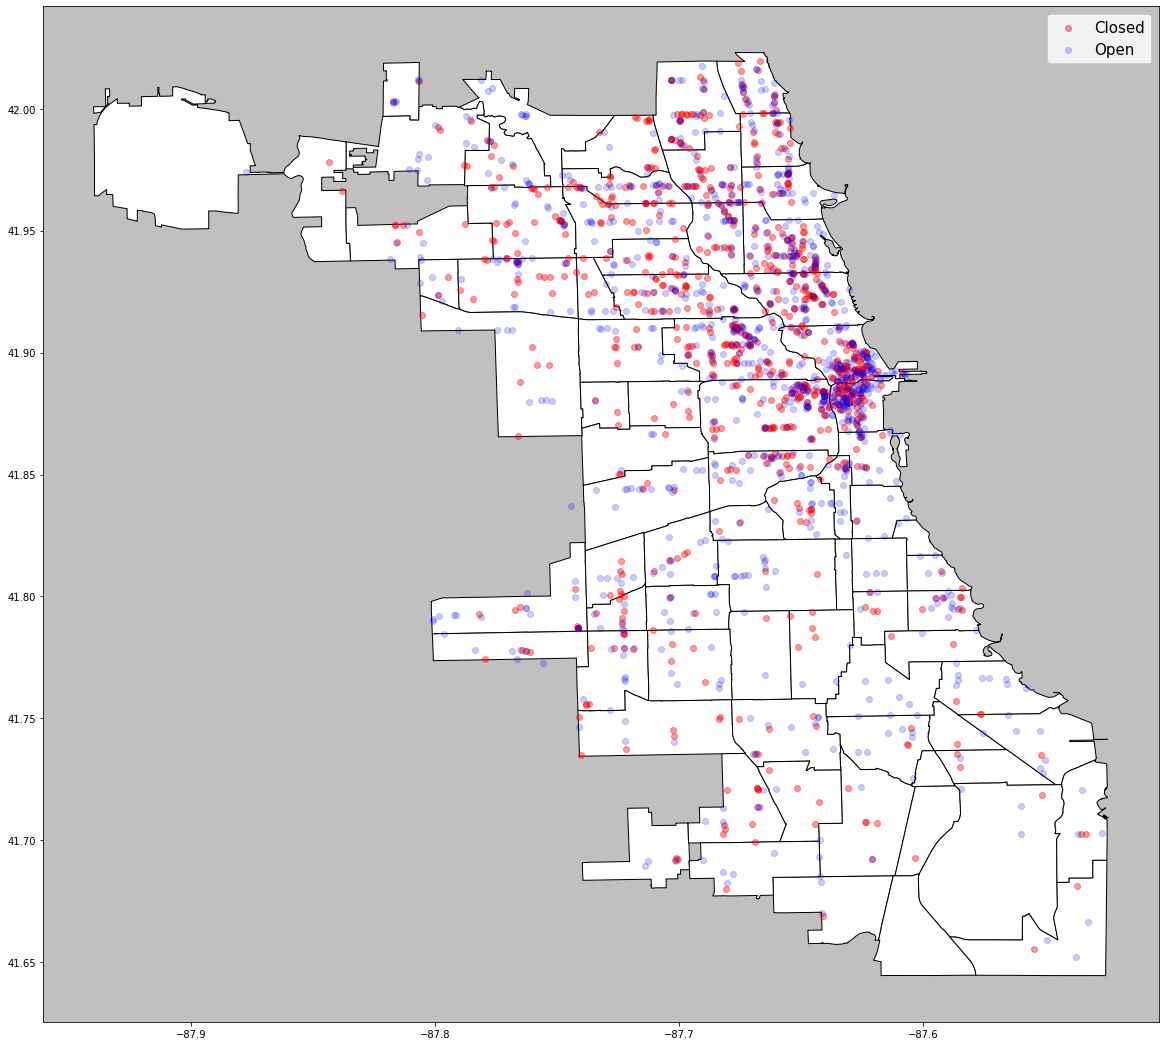

In [234]:
#try to layer these
#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
#literally uses Chicago data to do this 
fig,ax = plt.subplots(figsize = (20,20))
ax.set_facecolor('silver')
chicago.plot(ax=ax, color = "white", edgecolor = "black")
closed.plot(ax=ax, color = "red", alpha = 0.4, label = "Closed")
rest_open.sample(n=1000).plot(ax=ax, color = "blue", alpha = 0.2, label = "Open")
plt.legend(prop = {"size":15})
#plt.savefig('restaurants.png')

In [154]:
#lets see if we can use the covid shapefile from city of chicago on this 
covid = gpd.read_file('covid.geojson')

In [163]:
covid

,zip_code,week_end,test_rate_weekly,deaths_cumulative,cases_weekly,population,case_rate_cumulative,deaths_weekly,death_rate_cumulative,week_number,...,tests_cumulative,row_id,cases_cumulative,test_rate_cumulative,death_rate_weekly,percent_tested_positive_cumulative,case_rate_weekly,week_start,percent_tested_positive_weekly,geometry
0,60603,2020-03-07T00:00:00,0,0,None,1174,None,0,0.0,10,...,0,60603-2020-10,None,0,0.0,0.000,None,2020-03-01T00:00:00,0.000,POINT (-87.62547 41.88011)
1,60603,2020-03-14T00:00:00,0,0,None,1174,None,0,0.0,11,...,0,60603-2020-11,None,0,0.0,0.000,None,2020-03-08T00:00:00,0.000,POINT (-87.62547 41.88011)
2,60603,2020-03-21T00:00:00,85.2,0,None,1174,None,0,0.0,12,...,1,60603-2020-12,None,85.2,0.0,0.000,None,2020-03-15T00:00:00,0.000,POINT (-87.62547 41.88011)
3,60603,2020-03-28T00:00:00,255.5,0,None,1174,None,0,0.0,13,...,4,60603-2020-13,None,340.7,0.0,0.000,None,2020-03-22T00:00:00,0.000,POINT (-87.62547 41.88011)
4,60603,2020-04-04T00:00:00,511.1,0,None,1174,None,0,0.0,14,...,10,60603-2020-14,None,851.8,0.0,0.000,None,2020-03-29T00:00:00,0.000,POINT (-87.62547 41.88011)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,60621,2020-04-18T00:00:00,578.5,9,76,29042,754.1,3,31,16,...,586,60621-2020-16,219,2017.8,10.3,0.353,261.7,2020-04-12T00:00:00,0.399,POINT (-87.63881 41.77693)
3236,60630,2020-08-29T00:00:00,1728.2,63,51,57344,2026.4,1,109.9,35,...,14524,60630-2020-35,1162,25327.8,1.7,0.088,88.9,2020-08-23T00:00:00,0.062,POINT (-87.75961 41.97126)
3237,60640,2021-01-23T00:00:00,4852.6,138,90,69715,5480.9,3,197.9,3,...,80467,60640-2021-3,3821,115422.8,4.3,0.048,129.1,2021-01-17T00:00:00,0.028,POINT (-87.66223 41.97189)
3238,60666,2020-11-07T00:00:00,0,0,None,0,None,0,0.0,45,...,0,60666-2020-45,None,0,0.0,0.000,None,2020-11-01T00:00:00,0.000,POINT (-87.89637 41.97951)


<AxesSubplot:>

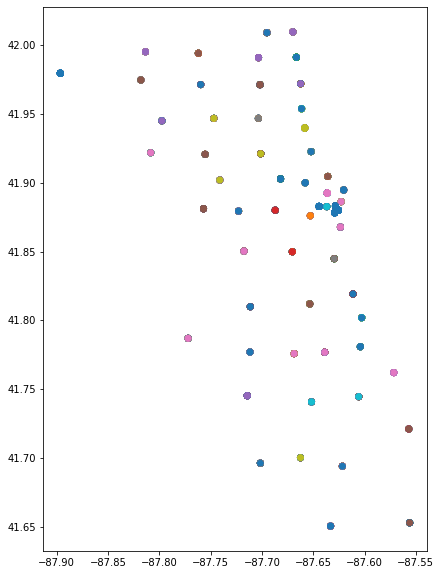

In [164]:
covid.plot(column = "death_rate_cumulative")

<AxesSubplot:>

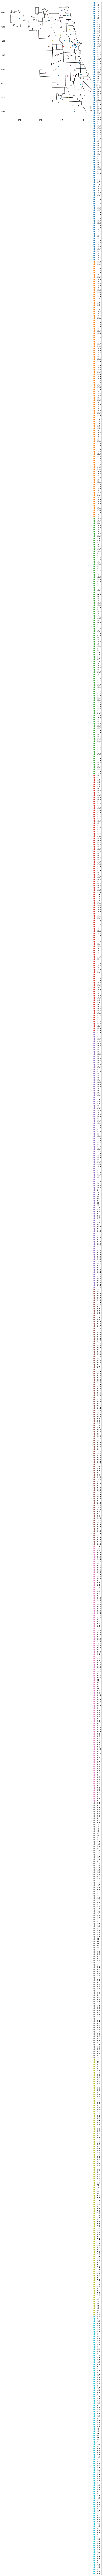

In [232]:
fig,ax = plt.subplots(figsize = (15,15))
chicago.plot(ax=ax, color = "white", edgecolor = "black")
covid.plot(column="death_rate_cumulative", ax=ax, legend=True)


In [239]:
#try to plot covid cumulative death rate as a bubble plot 
covid_points = covid.copy()
covid_points["geometry"] = covid_points["geometry"].centroid

<ipython-input-239-b4308237c66f>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  covid_points["geometry"] = covid_points["geometry"].centroid


NameError: name 'covid_points' is not defined

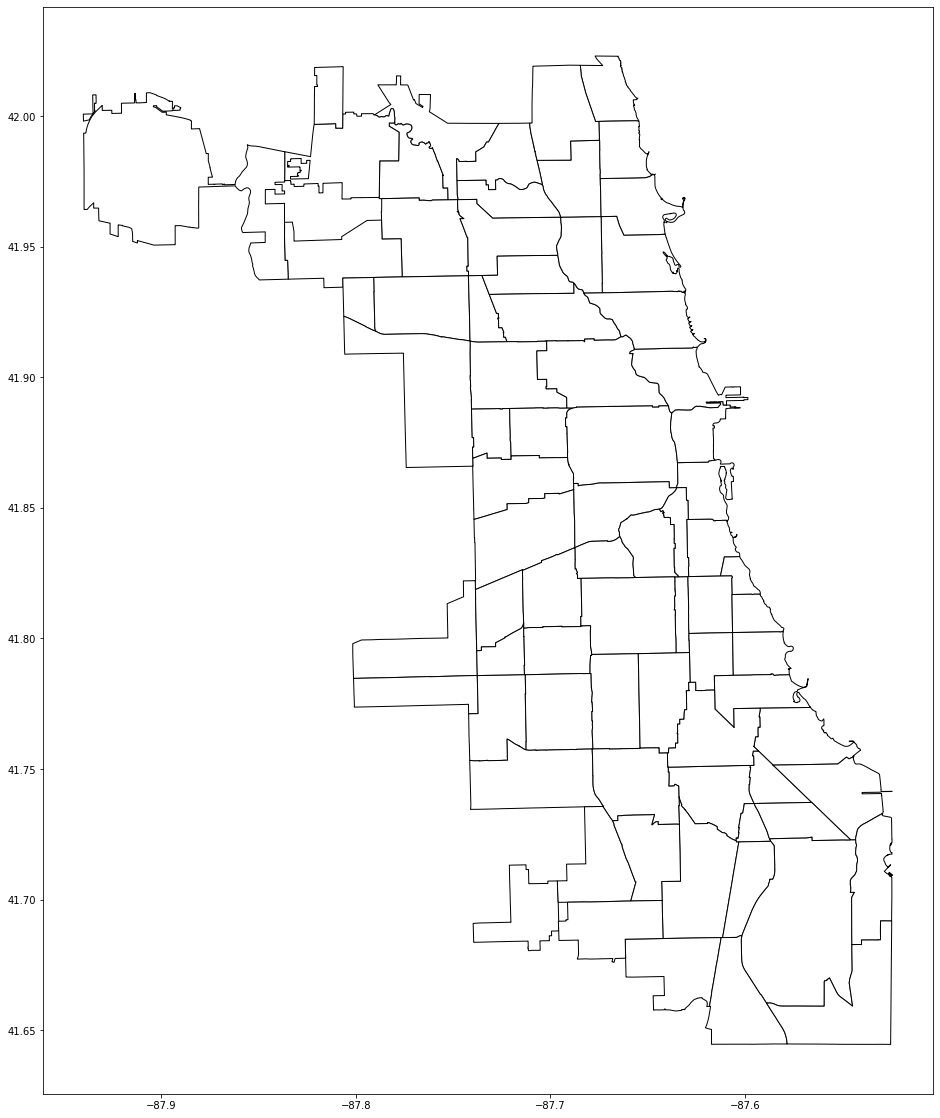

In [237]:
fig, ax = plt.subplots(figsize=(20,20))
chicago.plot(ax=ax, color= "white", edgecolor= "black")
covid_points.plot(ax=ax,color= "red" , markersize="death_rate_cumulative", alpha=0.7, categorical=False, legend=True )

In [244]:
#test with the shape file instead 
covid_shp = gpd.read_file("covid_shape")

In [250]:
covid_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [251]:
covid_crs = covid_shp.to_crs("EPSG:3395")

<AxesSubplot:>

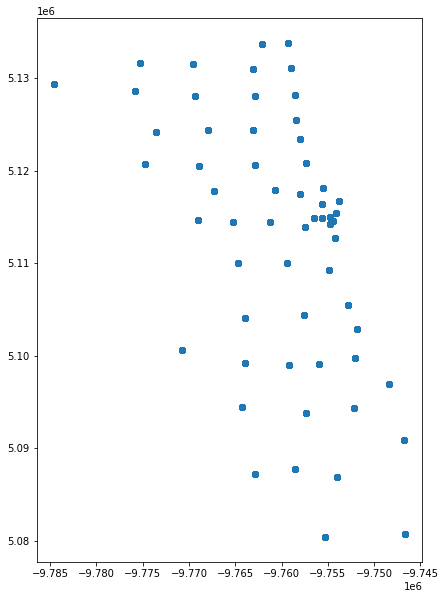

In [252]:
covid_crs.plot()

In [253]:
c_points = covid_crs.copy()
c_points["geometry"] = c_points["geometry"].centroid

In [258]:
chicago_crs = chicago.to_crs("EPSG:3395")

<AxesSubplot:>

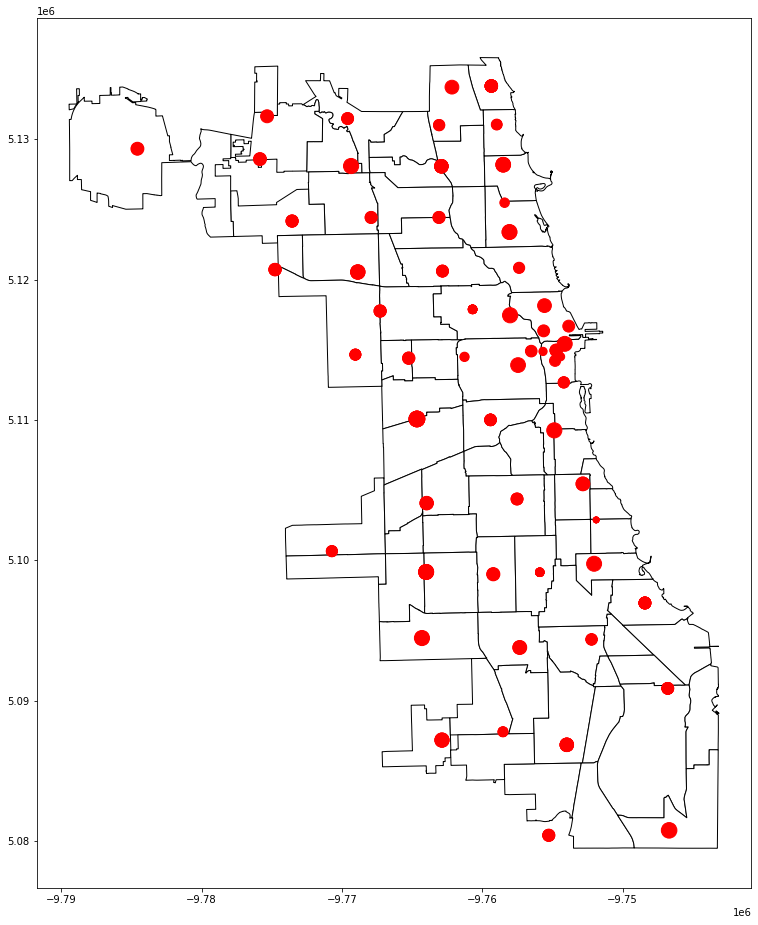

In [274]:
fig, ax = plt.subplots(figsize=(16,16))
chicago_crs.plot(ax=ax, color = "white", edgecolor = "black")
c_points.plot(ax=ax, color = "red", markersize="deaths_cum", alpha = 1)


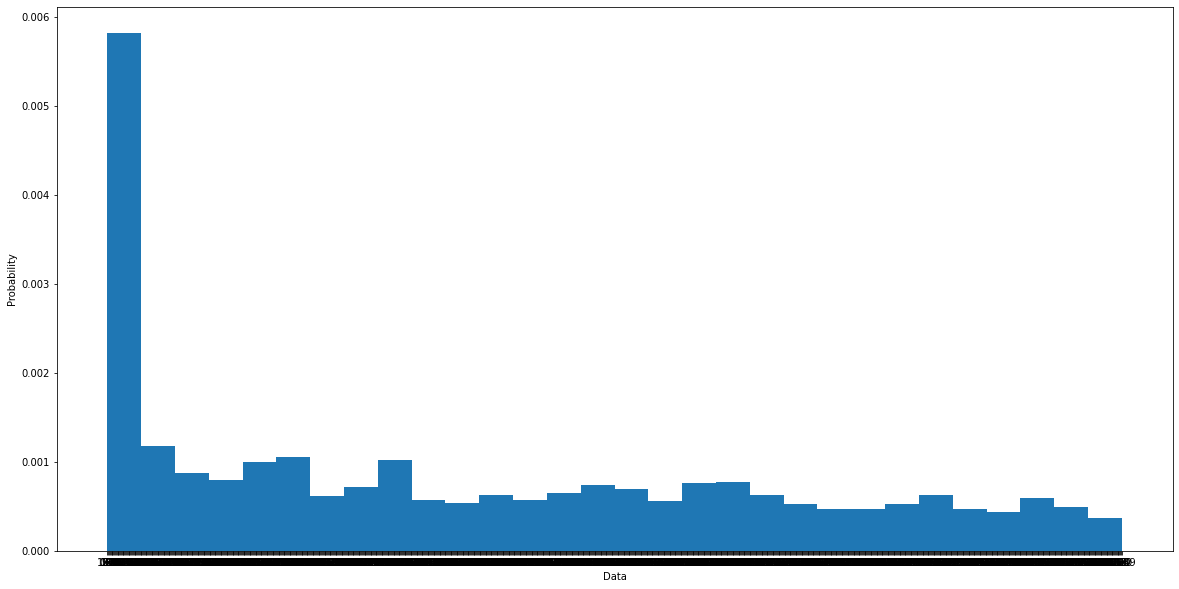

In [276]:
plt.hist(covid["death_rate_cumulative"], density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Data');